In [1]:
## 导入需要的库
import numpy as np
import pandas as pd
import math
import os
import random
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest

In [2]:
## 读取对数收益率数据
data = pd.read_csv("归一化数据.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.542315,0.631639,0.537692,0.657919,0.425744,0.533389,0.432409,0.655109,0.533334,0.454244,...,0.618472,0.499274,0.496539,0.506831,0.472601,0.540841,0.522418,0.551274,0.548531,0.472711
1,0.447122,0.625455,0.506848,0.492007,0.638708,0.775372,0.466275,0.486687,0.521557,0.493482,...,0.505660,0.553300,0.521557,0.553096,0.552896,0.442834,0.441554,0.569715,0.505557,0.521557
2,0.274827,0.525519,0.597789,0.462946,0.515822,0.387707,0.535493,0.275107,0.520282,0.478059,...,0.616526,0.434512,0.548418,0.433224,0.753095,0.458347,0.570396,0.614078,0.525519,0.761053
3,0.513593,0.519015,0.508134,0.414162,0.502106,0.602256,0.390319,0.603137,0.596409,0.702611,...,0.107530,0.699745,0.002770,0.008172,0.471095,0.630606,0.550657,0.816108,0.271831,0.147693
4,0.582469,0.490905,0.563069,0.358929,0.322298,0.591241,0.684933,0.445066,0.304304,0.519341,...,0.567308,0.608957,0.668854,0.452971,0.441484,0.482484,0.503411,0.587869,0.503570,0.556060


In [5]:
def xiaoyong(x,singam,theta):
    lamda = np.zeros((len(x),6));
    u = np.ones((len(x),6));
    u1 = np.zeros((len(x),6));
    
    for i in range(0,len(x)): # 计算不同属性下的函数
        # 计算相对损失函数
        lamda[i,1] = singam * x[i];
        lamda[i,2] = x[i];
        lamda[i,3] = 1-x[i];
        lamda[i,4] = singam * (1-x[i]);
    
        # 计算基于后悔理论的效用函数
        u[i,1] = 1 - (1 - np.exp(-theta * lamda[i,1]))/theta
        u[i,2] = 1 - (1 - np.exp(-theta * lamda[i,2]))/theta
        u[i,3] = 1 - (1 - np.exp(-theta * lamda[i,3]))/theta
        u[i,4] = 1 - (1 - np.exp(-theta * lamda[i,4]))/theta
        
        # 计算相对效用函数
        u1[i,0] = 1 - u[i,2] 
        u1[i,1] = u[i,1] - u[i,2] 
        u1[i,4] = u[i,4] - u[i,3] 
        u1[i,5] = 1 - u[i,3]
        
    return u1

In [59]:
# 计算不同对象的聚合相对效用函数矩阵
X = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
theta = 0.5
n, m = len(data), len(data.T)
lamda = np.zeros((len(X),6));
u = np.ones((len(X),6));
u1 = np.zeros((len(X),6));
u3 = np.zeros((len(X),6))
x = data.iloc[0]
yuzhi = np.zeros((len(X),2))

for k in range(0,len(X)):
    singam = X[k]
   
    # 计算相对损失函数
    lamda[k,1] = singam * x[0];
    lamda[k,2] = x[0];
    lamda[k,3] = 1-x[0];
    lamda[k,4] = singam * (1-x[0]);
    
    # 计算基于后悔理论的效用函数
    u[k,1] = 1 - (1 - np.exp(-theta * lamda[k,1]))/theta
    u[k,2] = 1 - (1 - np.exp(-theta * lamda[k,2]))/theta
    u[k,3] = 1 - (1 - np.exp(-theta * lamda[k,3]))/theta
    u[k,4] = 1 - (1 - np.exp(-theta * lamda[k,4]))/theta
        
    # 计算相对效用函数
    u1[k,0] = 1 - u[k,2] 
    u1[k,1] = u[k,1] - u[k,2] 
    u1[k,4] = u[k,4] - u[k,3] 
    u1[k,5] = 1 - u[k,3]
    u2 = np.max(u1, axis = 0)
    delta = 0.01
    for j in range(0,6):
        u3[k][j] = u1[k,j] + 1 - np.exp(- delta * (u1[k,j]-u2[j]))
            
    #根据基于后悔理论的相对效用函数计算不同对象的不同粒度下的阈值
    yuzhi[k][0] = (u3[k][4])/(u3[k][4]+u3[k][0]-u3[k][1])
    yuzhi[k][1] = (u3[k][5]-u3[k][4])/(u3[k][1]+u3[k][5]-u3[k][4])
yuzhi    

array([[0.9348302 , 0.04832714],
       [0.87117799, 0.09743406],
       [0.80957961, 0.14682352],
       [0.74992193, 0.19647693],
       [0.69209993, 0.24637548],
       [0.63601604, 0.2965001 ],
       [0.58157944, 0.34683152],
       [0.52870553, 0.39735032],
       [0.47731538, 0.4480369 ]])

In [132]:
# 计算不同对象的聚合相对效用函数矩阵
X = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
theta = 0.5
n, m = len(data), len(data.T)
lamda = np.zeros((len(X),6));
u = np.ones((len(X),6));
u1 = np.zeros((len(X),6));
u3 = np.zeros((len(X),6))
x = data.iloc[1]
yuzhi = np.zeros((len(X),2))

for k in range(0,len(X)):
    singam = X[k]
   
    # 计算相对损失函数
    lamda[k,1] = singam * x[0];
    lamda[k,2] = x[0];
    lamda[k,3] = 1-x[0];
    lamda[k,4] = singam * (1-x[0]);
    
    # 计算基于后悔理论的效用函数
    u[k,1] = 1 - (1 - np.exp(-theta * lamda[k,1]))/theta
    u[k,2] = 1 - (1 - np.exp(-theta * lamda[k,2]))/theta
    u[k,3] = 1 - (1 - np.exp(-theta * lamda[k,3]))/theta
    u[k,4] = 1 - (1 - np.exp(-theta * lamda[k,4]))/theta
        
    # 计算相对效用函数
    u1[k,0] = 1 - u[k,2] 
    u1[k,1] = u[k,1] - u[k,2] 
    u1[k,4] = u[k,4] - u[k,3] 
    u1[k,5] = 1 - u[k,3]
    u2 = np.max(u1, axis = 0)
    delta = 0.1
    for j in range(0,6):
        u3[k][j] = u1[k,j] + 1 - np.exp(-delta * (u1[k,j]-u2[j]))
            
    #根据基于后悔理论的相对效用函数计算不同对象的不同粒度下的阈值
    yuzhi[k][0] = (u3[k][4])/(u3[k][4]+u3[k][0]-u3[k][1])
    yuzhi[k][1] = (u3[k][5]-u3[k][4])/(u3[k][1]+u3[k][5]-u3[k][4])
yuzhi    

array([[0.9534727 , 0.06763845],
       [0.90170389, 0.13910823],
       [0.84930223, 0.20776334],
       [0.79628486, 0.27379122],
       [0.74266977, 0.33736312],
       [0.68847576, 0.39863589],
       [0.63372244, 0.45775336],
       [0.57843022, 0.51484774],
       [0.52262027, 0.57004075]])

In [80]:
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 16,
         }
config = {
            "font.family": 'serif',
            "font.size": 14,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

In [135]:
print(yuzhi.T[:][0])
print(yuzhi.T[:][1])

[0.9534727  0.90170389 0.84930223 0.79628486 0.74266977 0.68847576
 0.63372244 0.57843022 0.52262027]
[0.06763845 0.13910823 0.20776334 0.27379122 0.33736312 0.39863589
 0.45775336 0.51484774 0.57004075]


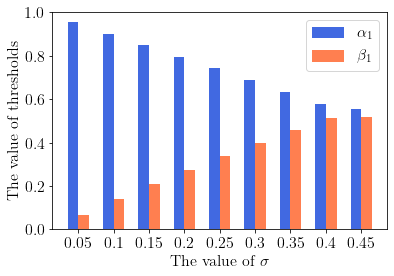

In [138]:
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6.0, 4.0)
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

X = ('0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45') 
Y1 = [0.9534727,  0.90170389, 0.84930223, 0.79628486, 0.74266977, 0.68847576, 0.63372244, 0.57843022, 0.55262027]
Y2 = [0.06763845, 0.13910823, 0.20776334, 0.27379122, 0.33736312, 0.39863589, 0.45775336, 0.51484774, 0.52004075]

bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
 
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')

plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of $\sigma$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
savefig("参数实验1.1.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [154]:
# 计算不同对象的聚合相对效用函数矩阵
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
singam = 0.15
n, m = len(data), len(data.T)
lamda = np.zeros((len(X),6));
u = np.ones((len(X),6));
u1 = np.zeros((len(X),6));
u3 = np.zeros((len(X),6))
x = data.iloc[1]
yuzhi = np.zeros((len(X),2))

for k in range(0,len(X)):
    theta = X[k]
   
    # 计算相对损失函数
    lamda[k,1] = singam * x[0];
    lamda[k,2] = x[0];
    lamda[k,3] = 1-x[0];
    lamda[k,4] = singam * (1-x[0]);
    
    # 计算基于后悔理论的效用函数
    u[k,1] = 1 - (1 - np.exp(-theta * lamda[k,1]))/theta
    u[k,2] = 1 - (1 - np.exp(-theta * lamda[k,2]))/theta
    u[k,3] = 1 - (1 - np.exp(-theta * lamda[k,3]))/theta
    u[k,4] = 1 - (1 - np.exp(-theta * lamda[k,4]))/theta
        
    # 计算相对效用函数
    u1[k,0] = 1 - u[k,2] 
    u1[k,1] = u[k,1] - u[k,2] 
    u1[k,4] = u[k,4] - u[k,3] 
    u1[k,5] = 1 - u[k,3]
    u2 = np.max(u1, axis = 0)
    delta = 0.1
    for j in range(0,6):
        u3[k][j] = u1[k,j] + 1 - np.exp(-delta * (u1[k,j]-u2[j]))
            
    #根据基于后悔理论的相对效用函数计算不同对象的不同粒度下的阈值
    yuzhi[k][0] = (u3[k][4])/(u3[k][4]+u3[k][0]-u3[k][1])
    yuzhi[k][1] = (u3[k][5]-u3[k][4])/(u3[k][1]+u3[k][5]-u3[k][4])
yuzhi    

array([[0.87197793, 0.182308  ],
       [0.86847267, 0.18584736],
       [0.86489605, 0.1894313 ],
       [0.86124738, 0.19305984],
       [0.857526  , 0.19673299],
       [0.85373122, 0.20045076],
       [0.84986238, 0.20421313],
       [0.84591882, 0.20802009],
       [0.8418999 , 0.21187163]])

In [155]:
print(yuzhi.T[:][0])
print(yuzhi.T[:][1])

[0.87197793 0.86847267 0.86489605 0.86124738 0.857526   0.85373122
 0.84986238 0.84591882 0.8418999 ]
[0.182308   0.18584736 0.1894313  0.19305984 0.19673299 0.20045076
 0.20421313 0.20802009 0.21187163]


In [157]:
yuzhi[0][0]-yuzhi[8][0]

0.030078030502269093

In [158]:
0.8720 - 0.8419

0.030100000000000016

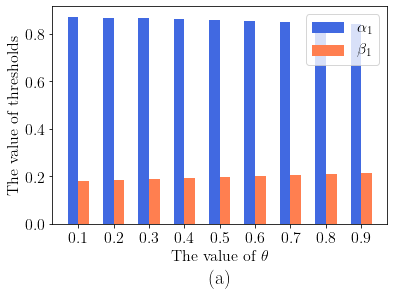

In [185]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
Y1 = [0.87197793, 0.86847267, 0.86489605, 0.86124738, 0.857526,   0.85373122, 0.84986238, 0.84591882, 0.8418999 ]
Y2 = [0.182308,   0.18584736, 0.1894313,  0.19305984, 0.19673299, 0.20045076, 0.20421313, 0.20802009, 0.21187163]

plt.rcParams['figure.figsize'] = (6.0, 4.0)
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')
plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of 'r'$\theta$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
plt.title('(a)', y=-0.3)
# savefig("参数实验2.2.jpg", dpi=300, bbox_inches='tight')
plt.show()

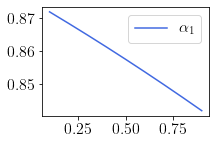

In [143]:
plt.rcParams['figure.figsize'] = (3.0, 2.0)
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
plt.plot(X, Y1, color='royalblue', label=r'$\alpha_1$')
plt.legend() # 显示图例
savefig("参数实验3.3.jpg", dpi=300, bbox_inches='tight')
plt.show()

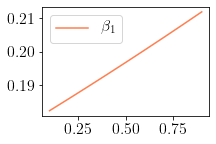

In [144]:
plt.rcParams['figure.figsize'] = (3.0, 2.0)
plt.plot(X, Y2, color='coral', label=r'$\beta_1$')
plt.legend() # 显示图例
savefig("参数实验4.4.jpg", dpi=300, bbox_inches='tight')
plt.show()

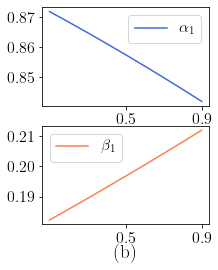

In [193]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
Y1 = [0.87197793, 0.86847267, 0.86489605, 0.86124738, 0.857526,   0.85373122, 0.84986238, 0.84591882, 0.8418999 ]
Y2 = [0.182308,   0.18584736, 0.1894313,  0.19305984, 0.19673299, 0.20045076, 0.20421313, 0.20802009, 0.21187163]
plt.rcParams['figure.figsize'] = (3, 4.0)
a = subplot(2,1,1)
plt.plot(X, Y1, color='royalblue', label=r'$\alpha_1$')
plt.legend() # 显示图例
plt.xticks([0.5,0.9]) #设置图片横坐标的显示
b = subplot(2,1,2)
b.plot(X, Y2, color='coral', label=r'$\beta_1$')
plt.legend() # 显示图例
plt.xticks([0.5,0.9])
plt.title('(b)', y=-0.4)
savefig("参数实验7.7.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [160]:
# 计算不同对象的聚合相对效用函数矩阵
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
singam = 0.15
theta = 0.5
n, m = len(data), len(data.T)
lamda = np.zeros((1,6));
u = np.ones((1,6));
u1 = np.zeros((1,6));
u3 = np.zeros((len(X),6))
x = data.iloc[1]
yuzhi = np.zeros((len(X),2))

for k in range(0,len(X)):
    # 计算相对损失函数
    lamda[0,1] = singam * x[0];
    lamda[0,2] = x[0];
    lamda[0,3] = 1-x[0];
    lamda[0,4] = singam * (1-x[0]);
    
    # 计算基于后悔理论的效用函数
    u[0,1] = 1 - (1 - np.exp(-theta * lamda[0,1]))/theta
    u[0,2] = 1 - (1 - np.exp(-theta * lamda[0,2]))/theta
    u[0,3] = 1 - (1 - np.exp(-theta * lamda[0,3]))/theta
    u[0,4] = 1 - (1 - np.exp(-theta * lamda[0,4]))/theta
        
    # 计算相对效用函数
    u1[0,0] = 1 - u[0,2] 
    u1[0,1] = u[0,1] - u[0,2] 
    u1[0,4] = u[0,4] - u[0,3] 
    u1[0,5] = 1 - u[0,3]
    u2 = np.max(u1, axis = 0)
    delta = X[k]
    for j in range(0,6):
        u3[k][j] = u1[0,j] + 1 - np.exp(-delta * (u1[0,j]-u2[j]))
            
    #根据基于后悔理论的相对效用函数计算不同对象的不同粒度下的阈值
    yuzhi[k][0] = (u3[k][4])/(u3[k][4]+u3[k][0]-u3[k][1])
    yuzhi[k][1] = (u3[k][5]-u3[k][4])/(u3[k][1]+u3[k][5]-u3[k][4])
yuzhi    

array([[0.857526  , 0.19673299],
       [0.85601312, 0.19819199],
       [0.85445541, 0.19968127],
       [0.85285085, 0.20120182],
       [0.85119729, 0.2027547 ],
       [0.84949248, 0.20434102],
       [0.84773398, 0.20596191],
       [0.84591924, 0.2076186 ],
       [0.84404552, 0.20931233],
       [0.8421099 , 0.21104443]])

In [161]:
print(yuzhi.T[:][0])
print(yuzhi.T[:][1])

[0.857526   0.85601312 0.85445541 0.85285085 0.85119729 0.84949248
 0.84773398 0.84591924 0.84404552 0.8421099 ]
[0.19673299 0.19819199 0.19968127 0.20120182 0.2027547  0.20434102
 0.20596191 0.2076186  0.20931233 0.21104443]


In [165]:
0.1967 - 0.2110 

-0.01429999999999998

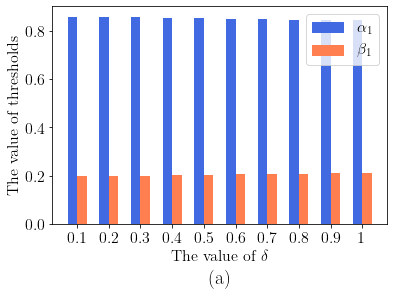

In [162]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Y1 = yuzhi.T[:][0]
Y2 = yuzhi.T[:][1]
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
plt.rcParams['figure.figsize'] = (6.0, 4.0)
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')

plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of 'r'$\delta$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
plt.title('(a)', y=-0.3)
savefig("参数实验5.5.jpg", dpi=300, bbox_inches='tight')
plt.show()

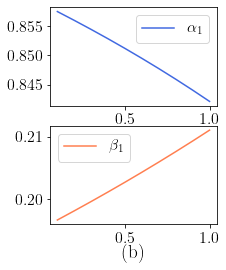

In [163]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Y1 = yuzhi.T[:][0]
Y2 = yuzhi.T[:][1]
plt.rcParams['figure.figsize'] = (3.0, 4.0)
a = subplot(2,1,1)
plt.plot(X, Y1, color='royalblue', label=r'$\alpha_1$')
plt.legend() # 显示图例
b = subplot(2,1,2)
b.plot(X, Y2, color='coral', label=r'$\beta_1$')
plt.legend() # 显示图例
plt.title('(b)', y=-0.4)
savefig("参数实验6.6.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [178]:
# 计算不同对象的聚合相对效用函数矩阵
X1 = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
X2 = [0.1, 0.5, 0.9]
n, m = len(data), len(data.T)
x = data.iloc[1]

for k1 in range(0,len(X1)):
    for k2 in range(0,len(X2)):
        singam = X1[k1]
        theta = X2[k2]
        u = np.ones((1,6));
        u1 = np.zeros((1,6));
        u3 = np.zeros((1,6))
        
        # 计算相对损失函数
        lamda[0,1] = singam * x[0];
        lamda[0,2] = x[0];
        lamda[0,3] = 1-x[0];
        lamda[0,4] = singam * (1-x[0]);
    
        # 计算基于后悔理论的效用函数
        u[0,1] = 1 - (1 - np.exp(-theta * lamda[0,1]))/theta
        u[0,2] = 1 - (1 - np.exp(-theta * lamda[0,2]))/theta
        u[0,3] = 1 - (1 - np.exp(-theta * lamda[0,3]))/theta
        u[0,4] = 1 - (1 - np.exp(-theta * lamda[0,4]))/theta
        
        # 计算相对效用函数
        u1[0,0] = 1 - u[0,2] 
        u1[0,1] = u[0,1] - u[0,2] 
        u1[0,4] = u[0,4] - u[0,3] 
        u1[0,5] = 1 - u[0,3]
        u2 = np.max(u1, axis = 0)
        delta = 0.1
        for j in range(0,6):
            u3[0][j] = u1[0,j] + 1 - np.exp(-delta * (u1[0,j]-u2[j]))
        
        yuzhi = np.zeros((1,6))
        #根据基于后悔理论的相对效用函数计算不同对象的不同粒度下的阈值
        yuzhi[0][0] = (u3[0][4])/(u3[0][4]+u3[0][0]-u3[0][1])
        yuzhi[0][1] = (u3[0][5]-u3[0][4])/(u3[0][1]+u3[0][5]-u3[0][4])
        print(singam,theta)
        print((round(yuzhi[0][0],4),round(yuzhi[0][1],4)))

0.05 0.1
(0.9581, 0.0624)
0.05 0.5
(0.9535, 0.0676)
0.05 0.9
(0.9486, 0.0731)
0.1 0.1
(0.9154, 0.1231)
0.1 0.5
(0.9065, 0.1327)
0.1 0.9
(0.897, 0.1426)
0.15 0.1
(0.872, 0.1823)
0.15 0.5
(0.859, 0.1953)
0.15 0.9
(0.8453, 0.2087)
0.2 0.1
(0.8278, 0.24)
0.2 0.5
(0.8111, 0.2557)
0.2 0.9
(0.7936, 0.2717)
0.25 0.1
(0.7828, 0.2962)
0.25 0.5
(0.7627, 0.3139)
0.25 0.9
(0.7418, 0.3318)
0.3 0.1
(0.737, 0.3511)
0.3 0.5
(0.714, 0.3701)
0.3 0.9
(0.6902, 0.3893)
0.35 0.1
(0.6904, 0.4046)
0.35 0.5
(0.6648, 0.4244)
0.35 0.9
(0.6386, 0.4443)
0.4 0.1
(0.6429, 0.4569)
0.4 0.5
(0.6153, 0.477)
0.4 0.9
(0.5872, 0.4971)


In [183]:
# 计算不同对象的聚合相对效用函数矩阵
X1 = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
X2 = [0.1, 0.5, 1]
n, m = len(data), len(data.T)
x = data.iloc[1]
theta = 0.5
for k1 in range(0,len(X1)):
    for k2 in range(0,len(X2)):
        singam = X1[k1]
        u = np.ones((1,6));
        u1 = np.zeros((1,6));
        u3 = np.zeros((1,6))
        
        # 计算相对损失函数
        lamda[0,1] = singam * x[0];
        lamda[0,2] = x[0];
        lamda[0,3] = 1-x[0];
        lamda[0,4] = singam * (1-x[0]);
    
        # 计算基于后悔理论的效用函数
        u[0,1] = 1 - (1 - np.exp(-theta * lamda[0,1]))/theta
        u[0,2] = 1 - (1 - np.exp(-theta * lamda[0,2]))/theta
        u[0,3] = 1 - (1 - np.exp(-theta * lamda[0,3]))/theta
        u[0,4] = 1 - (1 - np.exp(-theta * lamda[0,4]))/theta
        
        # 计算相对效用函数
        u1[0,0] = 1 - u[0,2] 
        u1[0,1] = u[0,1] - u[0,2] 
        u1[0,4] = u[0,4] - u[0,3] 
        u1[0,5] = 1 - u[0,3]
        u2 = np.max(u1, axis = 0)
        delta = X2[k2]
        for j in range(0,6):
            u3[0][j] = u1[0,j] + 1 - np.exp(-delta * (u1[0,j]))
        
        yuzhi = np.zeros((1,6))
        #根据基于后悔理论的相对效用函数计算不同对象的不同粒度下的阈值
        yuzhi[0][0] = (u3[0][4])/(u3[0][4]+u3[0][0]-u3[0][1])
        yuzhi[0][1] = (u3[0][5]-u3[0][4])/(u3[0][1]+u3[0][5]-u3[0][4])
        print(singam,delta)
        print((round(yuzhi[0][0],4),round(yuzhi[0][1],4)))

0.05 0.1
(0.9535, 0.0675)
0.05 0.5
(0.9546, 0.065)
0.05 1
(0.9566, 0.0605)
0.1 0.1
(0.9066, 0.1324)
0.1 0.5
(0.9086, 0.1279)
0.1 1
(0.9125, 0.1195)
0.15 0.1
(0.8592, 0.1949)
0.15 0.5
(0.8621, 0.1888)
0.15 1
(0.8678, 0.1773)
0.2 0.1
(0.8113, 0.2552)
0.2 0.5
(0.8151, 0.2478)
0.2 1
(0.8224, 0.2338)
0.25 0.1
(0.763, 0.3133)
0.25 0.5
(0.7675, 0.3051)
0.25 1
(0.7764, 0.2891)
0.3 0.1
(0.7143, 0.3695)
0.3 0.5
(0.7195, 0.3606)
0.3 1
(0.7296, 0.3432)
0.35 0.1
(0.6652, 0.4238)
0.35 0.5
(0.6709, 0.4145)
0.35 1
(0.6822, 0.3962)
0.4 0.1
(0.6157, 0.4764)
0.4 0.5
(0.6219, 0.4669)
0.4 1
(0.6341, 0.4482)
